In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np

import os
os.chdir('..')

In [2]:
with open('data/demonstration_real_center_out.pkl', 'rb') as fp:
    episodes = pickle.load(fp)

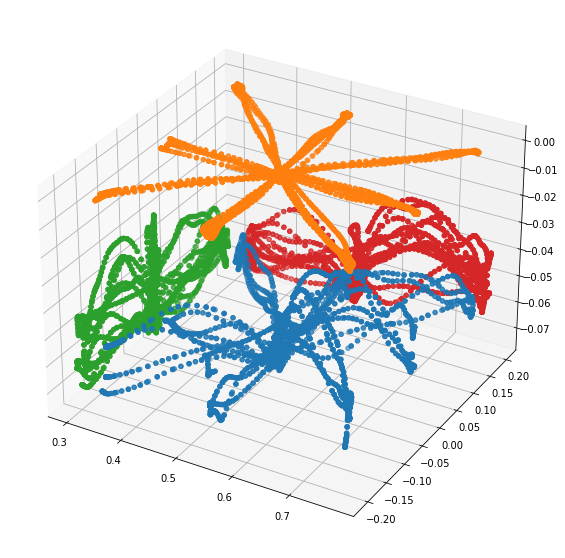

In [3]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(
    [step.translation[0] for episode in episodes['ee_pos'] for step in episode], 
    [step.translation[1] for episode in episodes['ee_pos'] for step in episode],
    [step.translation[2] for episode in episodes['ee_pos'] for step in episode])

ax.scatter(
    [step.translation[0] for episode in episodes['ee_pos'] for step in episode], 
    [step.translation[1] for episode in episodes['ee_pos'] for step in episode])

ax.scatter(
    .3,
    [step.translation[1] for episode in episodes['ee_pos'] for step in episode],
    [step.translation[2] for episode in episodes['ee_pos'] for step in episode])

ax.scatter(
    [step.translation[0] for episode in episodes['ee_pos'] for step in episode], 
    .2,
    [step.translation[2] for episode in episodes['ee_pos'] for step in episode])

plt.show()

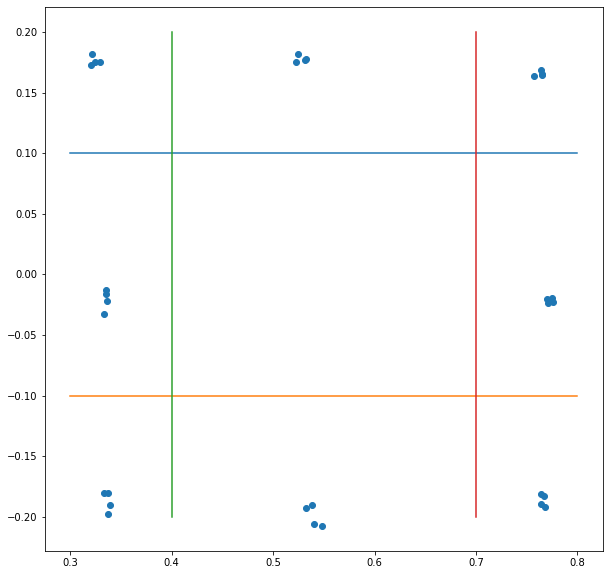

In [4]:
fig = plt.figure(figsize=(10, 10))

plt.scatter(
    [episode[-1].translation[0] for episode in episodes['ee_pos']],
    [episode[-1].translation[1] for episode in episodes['ee_pos']])

plt.plot([0.3, 0.8], [0.1, 0.1])
plt.plot([0.3, 0.8], [-0.1, -0.1])
plt.plot([0.4, 0.4], [-0.2, 0.2])
plt.plot([0.7, 0.7], [-0.2, 0.2])

plt.show()

In [5]:
goal_criteria = [
    lambda ee_pos: ee_pos[0] < 0.4 and ee_pos[1] > 0.1,
    lambda ee_pos: ee_pos[0] > 0.4 and ee_pos[0] < 0.7 and ee_pos[1] > 0.1,
    lambda ee_pos: ee_pos[0] > 0.7 and ee_pos[1] > 0.1,
    lambda ee_pos: ee_pos[0] < 0.4 and ee_pos[1] < 0.1 and ee_pos[1] > -0.1,
    lambda ee_pos: ee_pos[0] > 0.7 and ee_pos[1] < 0.1 and ee_pos[1] > -0.1,
    lambda ee_pos: ee_pos[0] < 0.4 and ee_pos[1] < -0.1,
    lambda ee_pos: ee_pos[0] > 0.4 and ee_pos[0] < 0.7 and ee_pos[1] < -0.1,
    lambda ee_pos: ee_pos[0] > 0.7 and ee_pos[1] < -0.1]

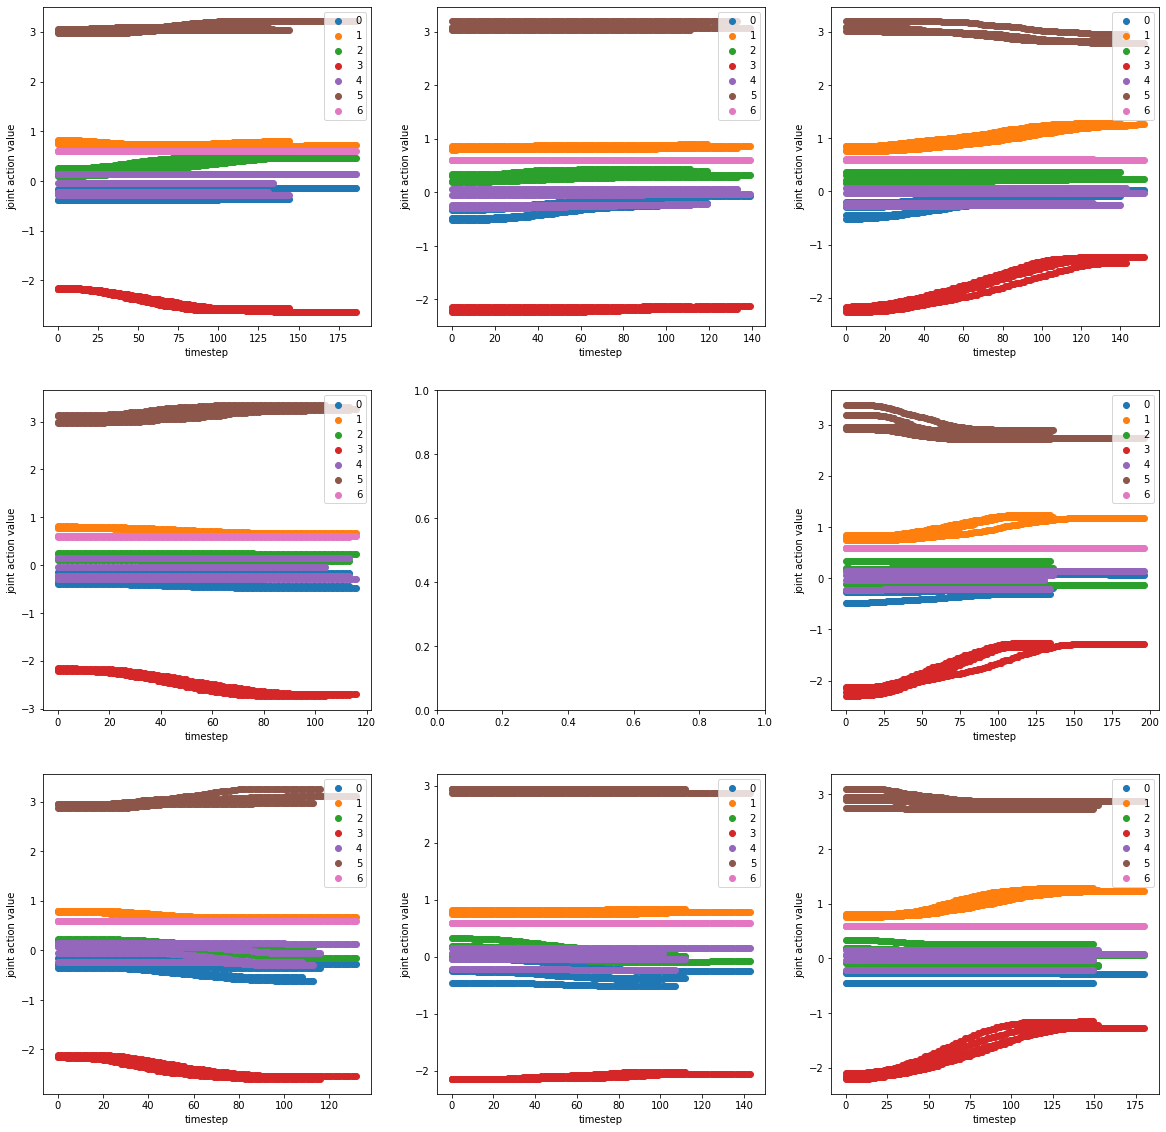

In [7]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

for i, goal_criterion in enumerate(goal_criteria):
    if i >= 4:
        i += 1 # offset for visualization
        
    episodes_by_goal = list(filter(
        lambda episode: goal_criterion(episode[0][-1].translation),
        zip(episodes['ee_pos'], episodes['j_pos'])))
        
    for joint_id in range(7):
        axs[i // 3, i % 3].scatter(
            [i for episode_ee_pos, episode_j_pos in episodes_by_goal for i, _ in enumerate(episode_j_pos)], 
            [step[joint_id] for episode_ee_pos, episode_j_pos in episodes_by_goal for step in episode_j_pos], 
            label=joint_id)
        
    axs[i // 3, i % 3].legend()
    axs[i // 3, i % 3].set_xlabel('timestep')
    axs[i // 3, i % 3].set_ylabel('joint action value')
    # axs[i // 3, i % 3].set_xlim(-1, 56)
    # axs[i // 3, i % 3].set_ylim(-.6, .6)

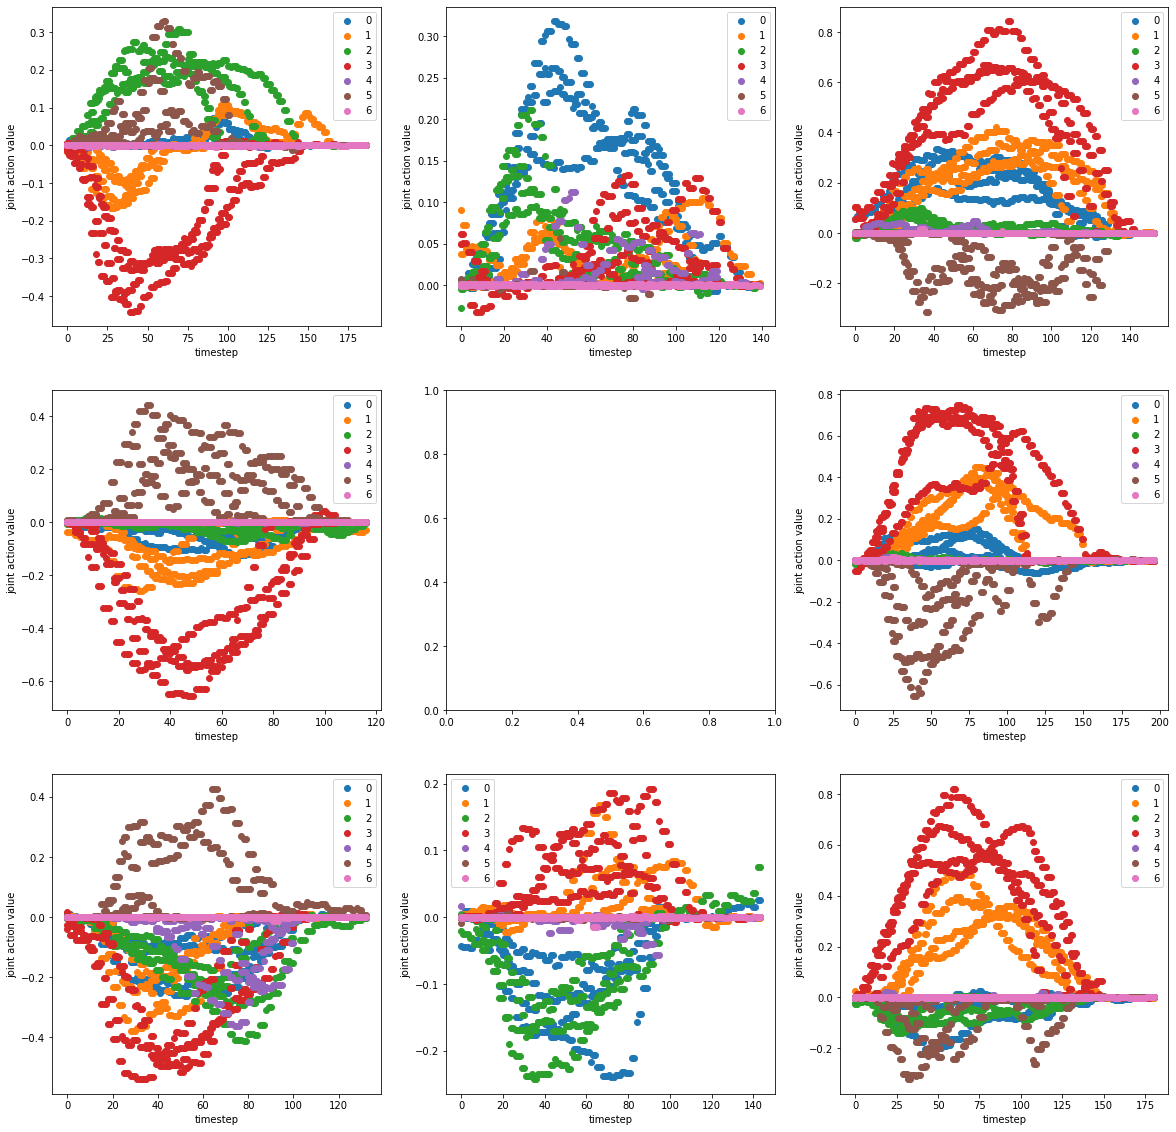

In [8]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

for i, goal_criterion in enumerate(goal_criteria):
    if i >= 4:
        i += 1 # offset for visualization
        
    episodes_by_goal = list(filter(
        lambda episode: goal_criterion(episode[0][-1].translation),
        zip(episodes['ee_pos'], episodes['j_vel'])))
        
    for joint_id in range(7):
        axs[i // 3, i % 3].scatter(
            [i for episode_ee_pos, episode_j_pos in episodes_by_goal for i, _ in enumerate(episode_j_pos)], 
            [step[joint_id] for episode_ee_pos, episode_j_pos in episodes_by_goal for step in episode_j_pos], 
            label=joint_id)
        
    axs[i // 3, i % 3].legend()
    axs[i // 3, i % 3].set_xlabel('timestep')
    axs[i // 3, i % 3].set_ylabel('joint action value')
    # axs[i // 3, i % 3].set_xlim(-1, 56)
    # axs[i // 3, i % 3].set_ylim(-.6, .6)